In [1]:
library(stringr)
library(data.table)
library(dummies)
library(ggplot2)

dummies-1.5.6 provided by Decision Patterns



In [2]:
reddit_comments_path = "/home/cbrom/workspace/datasets/big_data/reddit_comments.csv"

In [3]:
# reddit_comments <- read.csv(reddit_comments_path, nrows=1000)
# length is 1236782
reddit_comments <- read.csv(reddit_comments_path, nrows=1000000)

In [4]:
nrow(reddit_comments)

[1] 1000000

In [5]:
head(reddit_comments)

created_utc,ups,subreddit_id,link_id,name,score_hidden,author_flair_css_class,author_flair_text,subreddit,gilded,⋯,time_since_link,is_root,is_selftext,parent_cosine,parent_euc,cosine_euc,title_cosine,title_euc,no_of_past_comments,score_till_now
1430438556,4,t5_2qh55,t3_34gagr,t1_cqugc7x,0,,,food,0,⋯,6519,True,False,NA,NA,"(0.24304924461047894, 3.188900227798876)",0.2430492,3.188900,0,4
1430438572,2,t5_2qh55,t3_34drd4,t1_cqugcjl,0,,,food,0,⋯,52327,False,False,NA,NA,"(0.5145644843230366, 4.038002609254522)",0.5145645,4.038003,0,2
1430438641,1,t5_2qh55,t3_34drd4,t1_cqugdz8,0,,,food,0,⋯,52396,False,False,NA,NA,"(0.6836220117096632, 4.657358325188281)",0.6836220,4.657358,1,1
1430438762,2,t5_2qh55,t3_34gkc7,t1_cquggkz,0,,,food,0,⋯,1696,False,False,NA,NA,"(0.13002163500270414, 2.445489644653528)",0.1300216,2.445490,0,2
1430438833,0,t5_2qh55,t3_34fsr0,t1_cqugi3n,0,,,food,0,⋯,14986,True,False,NA,NA,"(0.6757868599768919, 5.91176665255238)",0.6757869,5.911767,0,0
1430438866,5,t5_2qh55,t3_34g0ql,t1_cqugirj,0,,,food,0,⋯,11371,False,False,NA,NA,"(0.5561018557762981, 5.644259450507274)",0.5561019,5.644259,0,5


In [6]:
# drop when title _cosine is nan
df <- reddit_comments[complete.cases(reddit_comments[, 'title_cosine']), ]

In [7]:
getmode <- function(values) {
    uniqvalues <- unique(values)
    uniqvalues[which.max(tabulate(match(values, uniqvalues)))]
}

In [8]:
# impute with mode of parent column score
parent_score_impute <- getmode(subset(df, (!is.na(df$parent_score)))$parent_score)
comment_tree_root_score_impute <- getmode(subset(df, (!is.na(df$comment_tree_root_score)))$comment_tree_root_score)
time_since_comment_tree_root_impute <- getmode(subset(df, (!is.na(df$time_since_comment_tree_root)))$time_since_comment_tree_root)
parent_cosine_impute <- 0
parent_euc_impute <- 0

In [9]:
# replace impute values
# parent_score
# comment_tree_root_score
# time_since_comment_tree_root
# parent_cosine
# parent_euc
df[is.na(df$parent_score)==TRUE, ]$parent_score <- parent_score_impute
df[is.na(df$comment_tree_root_score) == TRUE, ]$comment_tree_root_score <- comment_tree_root_score <- comment_tree_root_score_impute
df[is.na(df$time_since_comment_tree_root)==TRUE, ]$parent_score <- time_since_comment_tree_root_impute
df[is.na(df$parent_cosine)==TRUE, ]$parent_cosine <- parent_cosine_impute
df[is.na(df$parent_euc)==TRUE, ]$parent_euc <- parent_euc_impute


In [10]:
bool_cols <- c('over_18', 'is_edited', 'is_quoted', 'is_selftext')

cat_cols <- c('subreddit', 'distinguished','hour_of_comment', 'weekday')

numeric_cols <- c('gilded', 'controversiality', 'upvote_ratio','time_since_link',
                'depth', 'no_of_linked_sr', 'no_of_linked_urls', 'parent_score',
                'comment_tree_root_score', 'time_since_comment_tree_root',
                'subjectivity', 'senti_neg', 'senti_pos', 'senti_neu',
                'senti_comp', 'no_quoted', 'time_since_parent', 'word_counts',
                'no_of_past_comments', 'parent_cosine','parent_euc',
                'title_cosine', 'title_euc','link_score')

In [11]:
df[,numeric_cols] = apply(df[,numeric_cols], 2, function(x) as.double(as.character(x)));

In [12]:
features <- do.call(c, list(bool_cols, cat_cols, numeric_cols))

In [13]:
new_df <- df[, features]

In [14]:
head(new_df)

over_18,is_edited,is_quoted,is_selftext,subreddit,distinguished,hour_of_comment,weekday,gilded,controversiality,⋯,senti_comp,no_quoted,time_since_parent,word_counts,no_of_past_comments,parent_cosine,parent_euc,title_cosine,title_euc,link_score
False,False,False,False,food,user,0,4,0,0,⋯,0.5423,0,0,31,0,0,0,0.2430492,3.188900,131
False,False,False,False,food,user,0,4,0,0,⋯,-0.5719,0,0,35,0,0,0,0.5145645,4.038003,3816
False,False,False,False,food,user,0,4,0,0,⋯,0.0000,0,0,9,1,0,0,0.6836220,4.657358,3816
False,False,False,False,food,user,0,4,0,0,⋯,0.0000,0,0,25,0,0,0,0.1300216,2.445490,12
False,False,False,False,food,user,0,4,0,0,⋯,-0.2732,0,0,10,0,0,0,0.6757869,5.911767,98
False,False,False,False,food,user,0,4,0,0,⋯,0.6696,0,0,8,0,0,0,0.5561019,5.644259,719


In [15]:
## change boolean columns
new_df$over_18 <- as.integer(as.logical(new_df$over_18))
new_df$is_edited <- as.integer(as.logical(new_df$is_edited))
new_df$is_quoted <- as.integer(as.logical(new_df$is_quoted))
new_df$is_selftext <- as.integer(as.logical(new_df$is_selftext))
# new_df$is_flair <- as.character(new_df$is_flair)
# new_df$is_flair_css <- as.character(new_df$is_flair_css)

In [16]:
dummy_df <- dummy.data.frame(new_df, names=cat_cols)
# dummy_df$score <- df$score

In [17]:
tbplot <- new_df
tbplot$score <- df$score

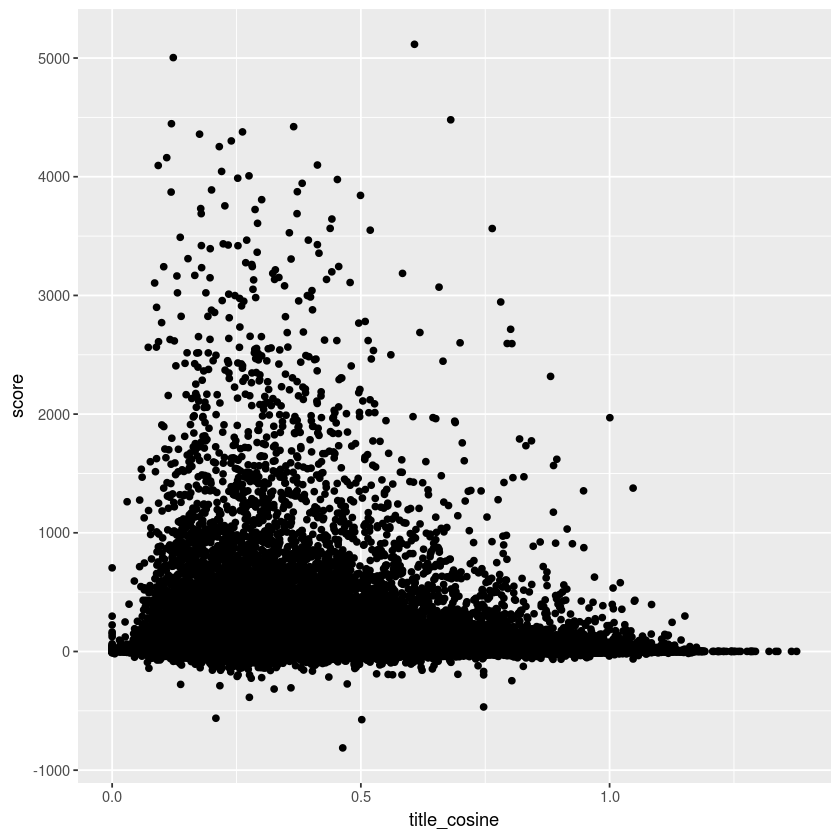

In [18]:
ggplot(data = tbplot, mapping = aes(x = title_cosine, y = score)) +
geom_point()

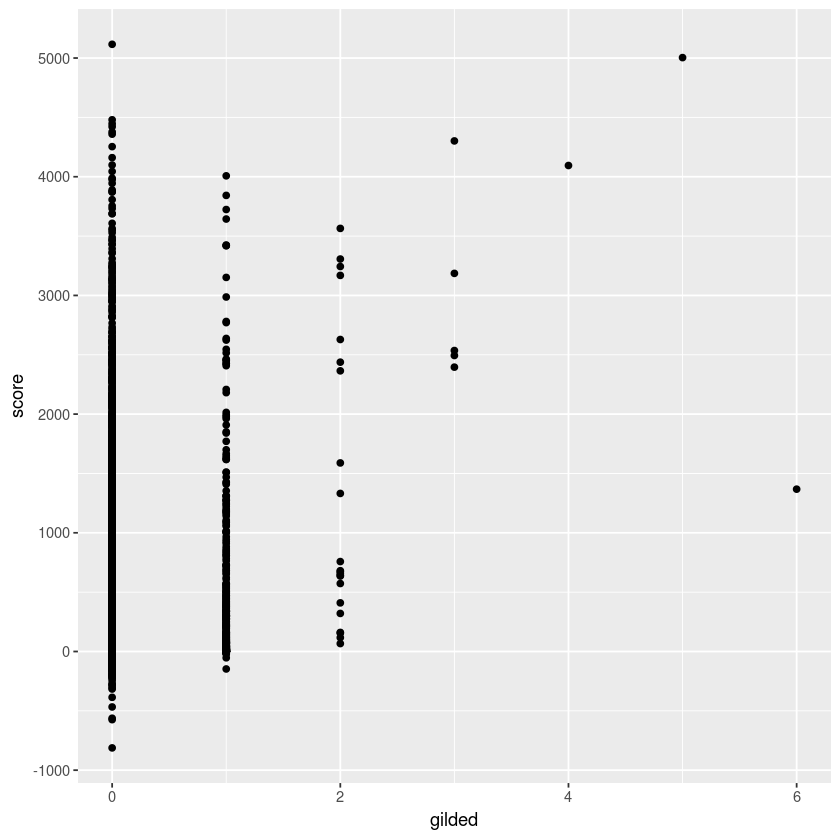

In [19]:
ggplot(data = tbplot, mapping = aes(x = gilded, y = score)) +
geom_point()

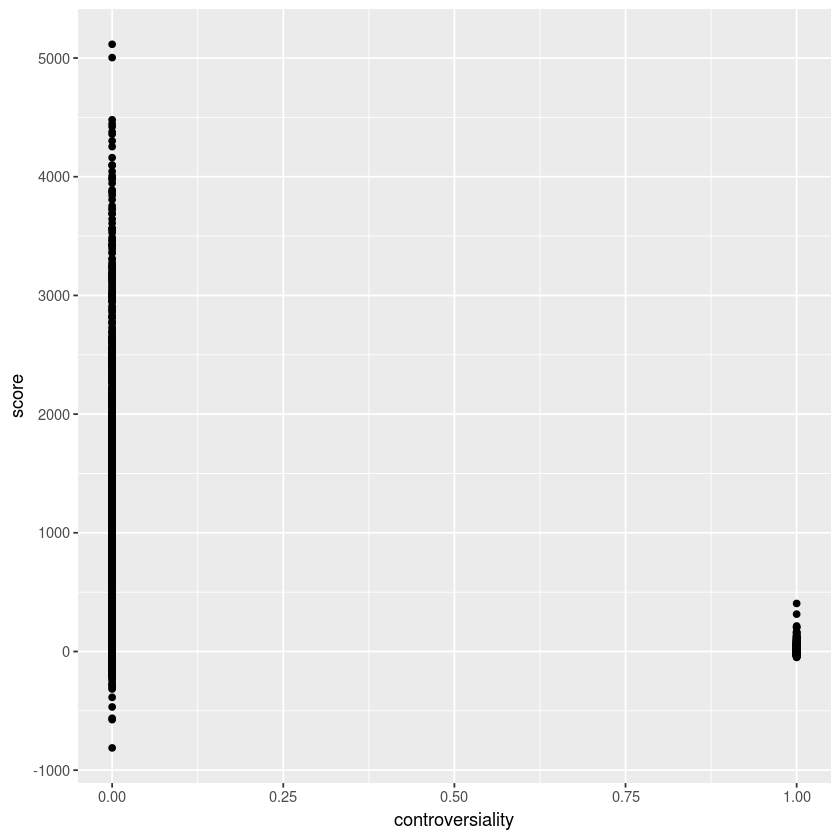

In [20]:
ggplot(data = tbplot, mapping = aes(x = controversiality, y = score)) +
geom_point()

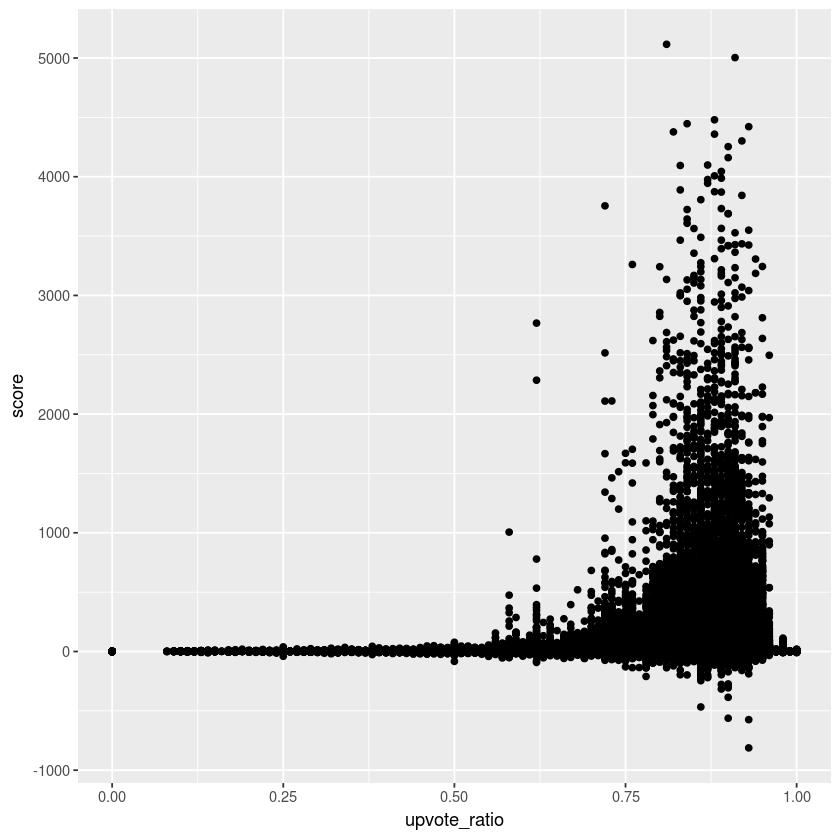

In [21]:
ggplot(data = tbplot, mapping = aes(x = upvote_ratio, y = score)) +
geom_point()

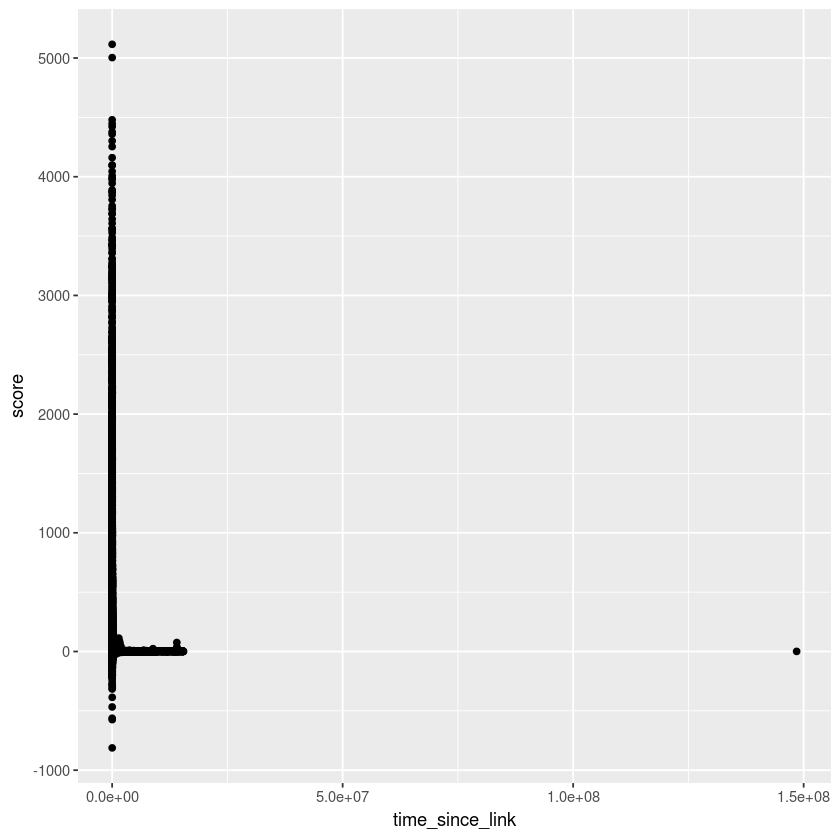

In [22]:
ggplot(data = tbplot, mapping = aes(x = time_since_link, y = score)) +
geom_point()

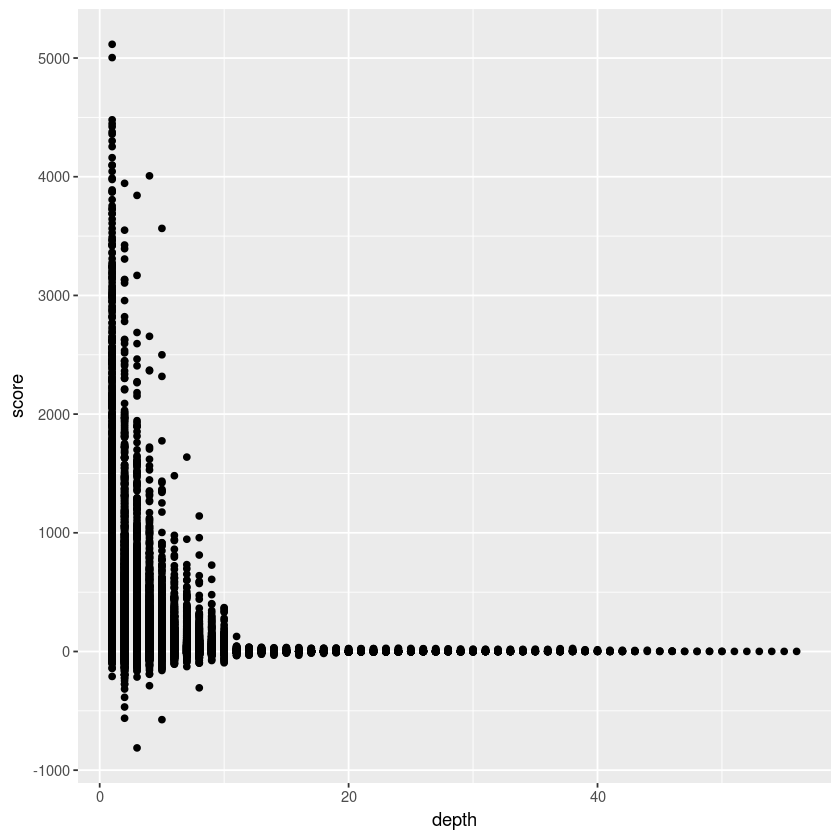

In [23]:
ggplot(data = tbplot, mapping = aes(x = depth, y = score)) +
geom_point()

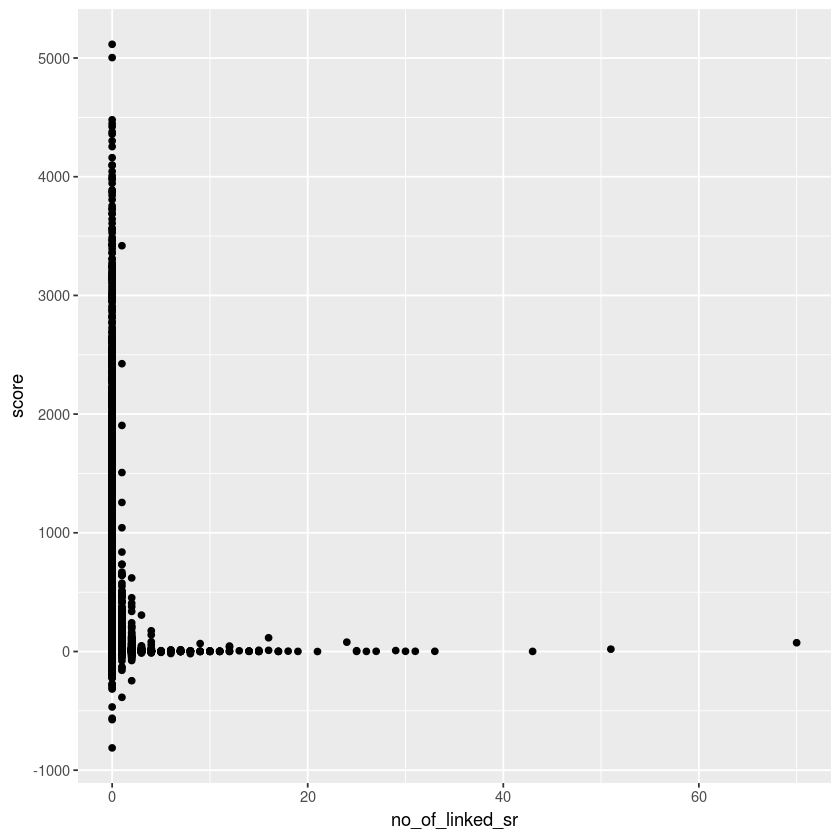

In [24]:
ggplot(data = tbplot, mapping = aes(x = no_of_linked_sr, y = score)) +
geom_point()

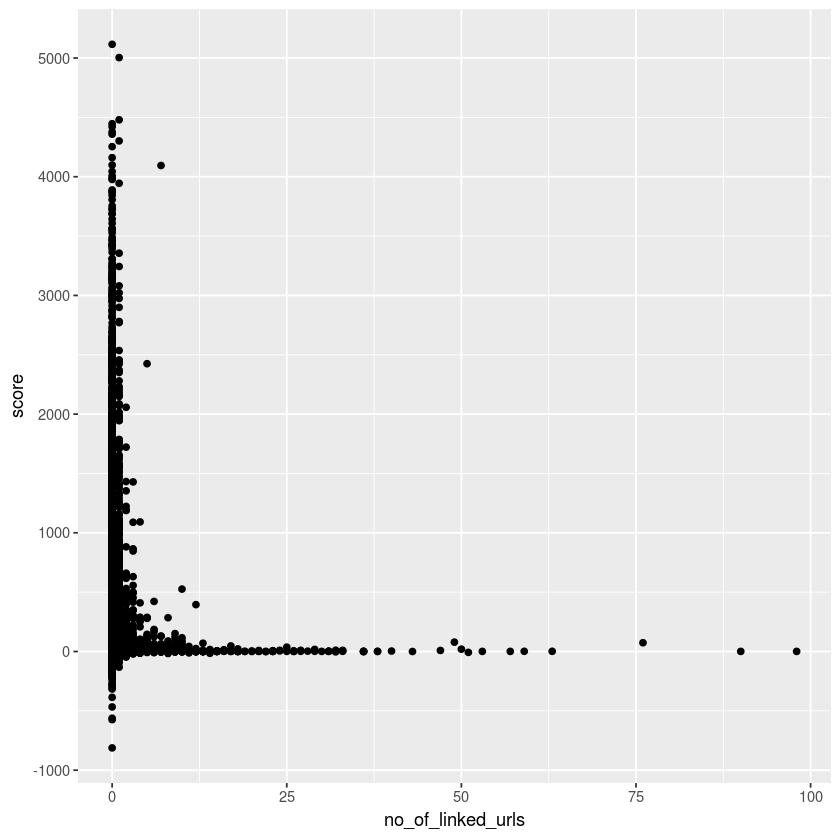

In [25]:
ggplot(data = tbplot, mapping = aes(x = no_of_linked_urls, y = score)) +
geom_point()

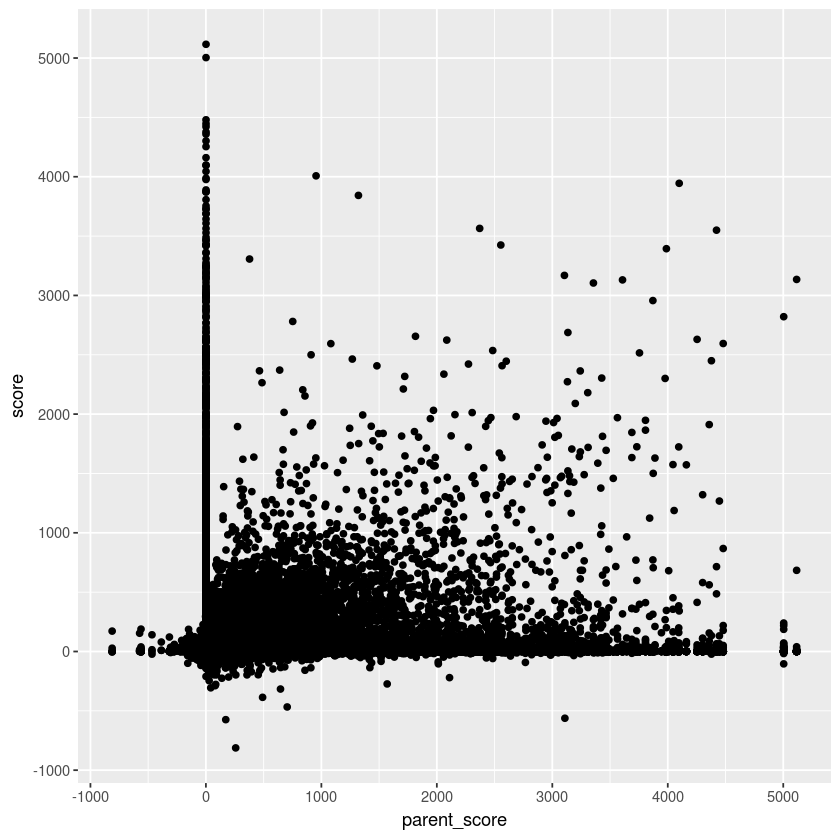

In [26]:
ggplot(data = tbplot, mapping = aes(x = parent_score, y = score)) +
geom_point()

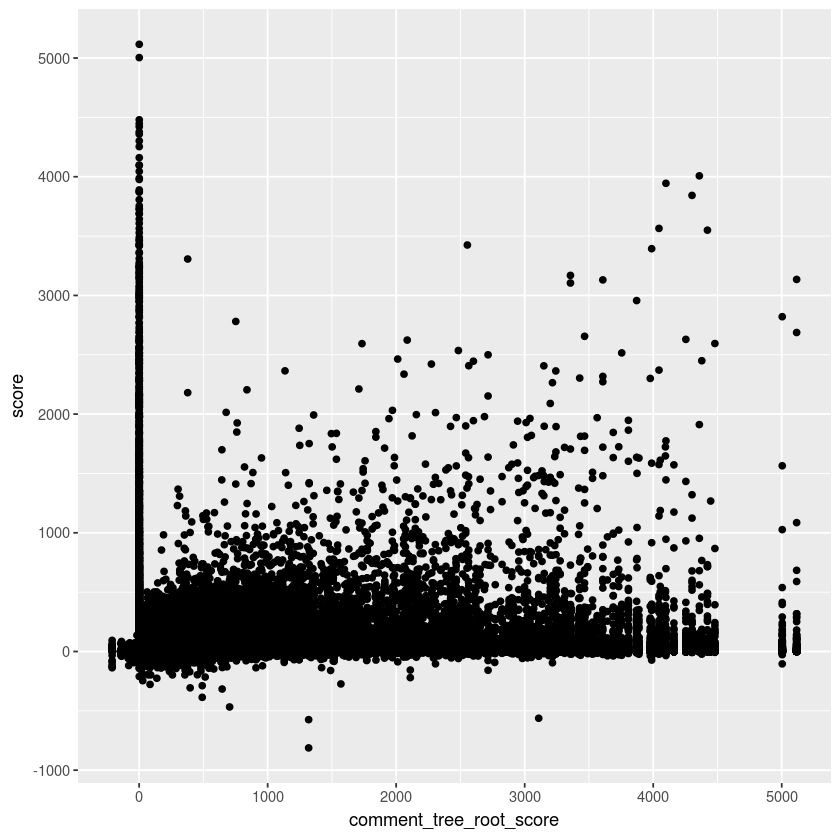

In [27]:
ggplot(data = tbplot, mapping = aes(x = comment_tree_root_score, y = score)) +
geom_point()

Warning message:
“Removed 58628 rows containing missing values (geom_point).”

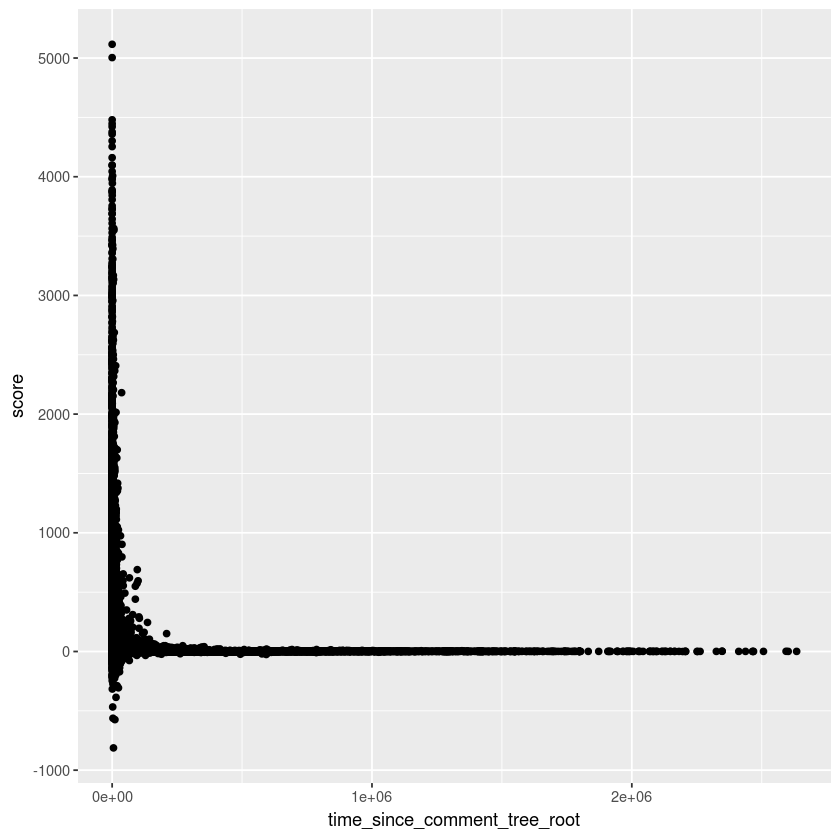

In [28]:
ggplot(data = tbplot, mapping = aes(x = time_since_comment_tree_root, y = score)) +
geom_point()

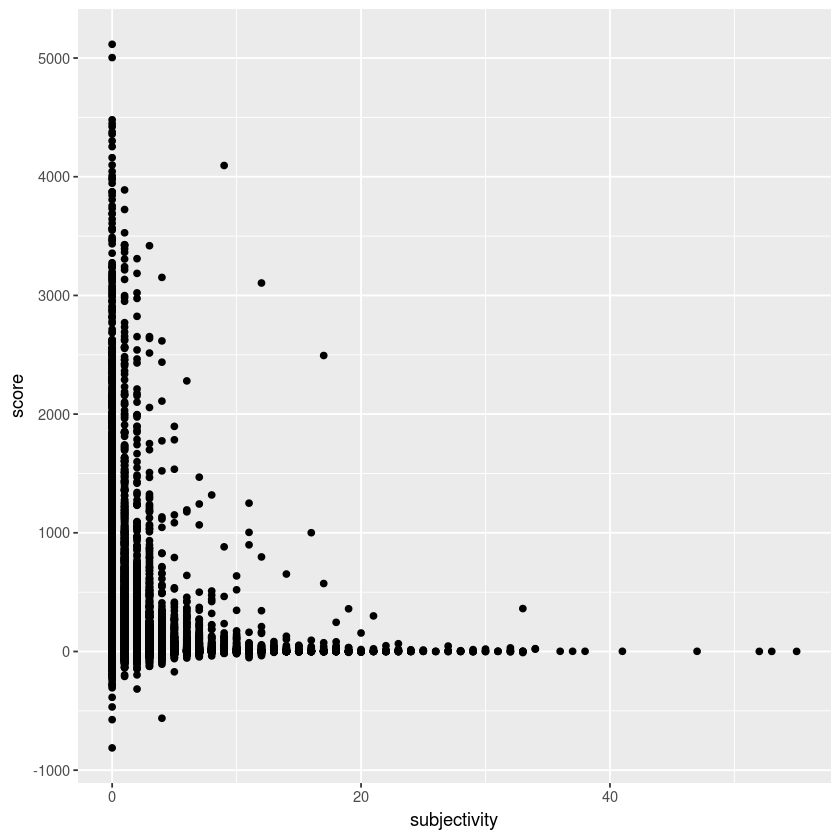

In [29]:
ggplot(data = tbplot, mapping = aes(x = subjectivity, y = score)) +
geom_point()

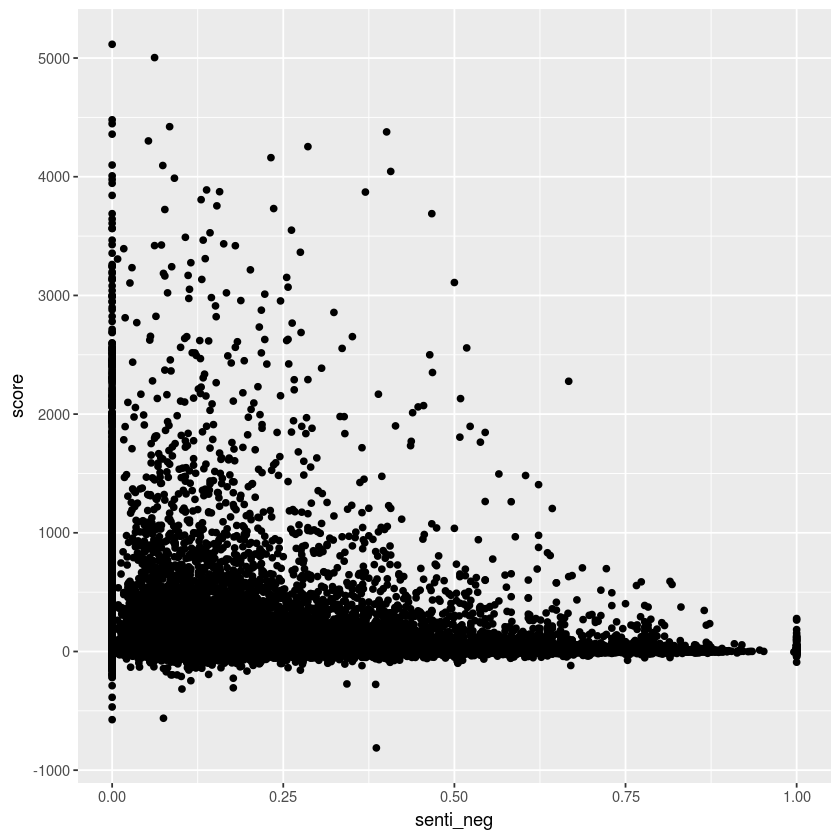

In [30]:
ggplot(data = tbplot, mapping = aes(x = senti_neg, y = score)) +
geom_point()

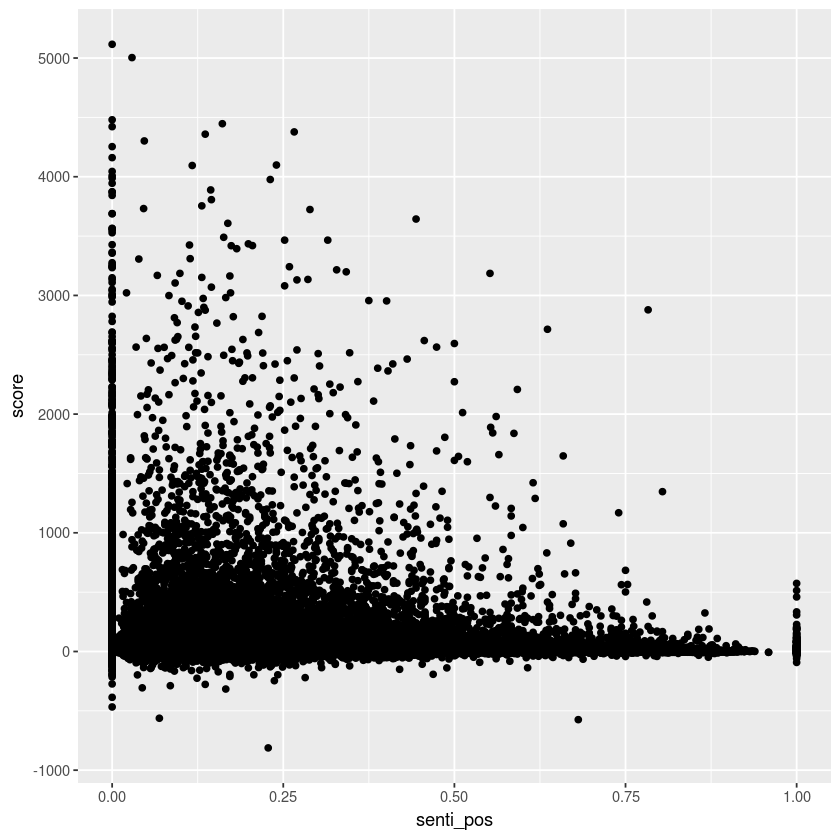

In [31]:
ggplot(data = tbplot, mapping = aes(x = senti_pos, y = score)) +
geom_point()

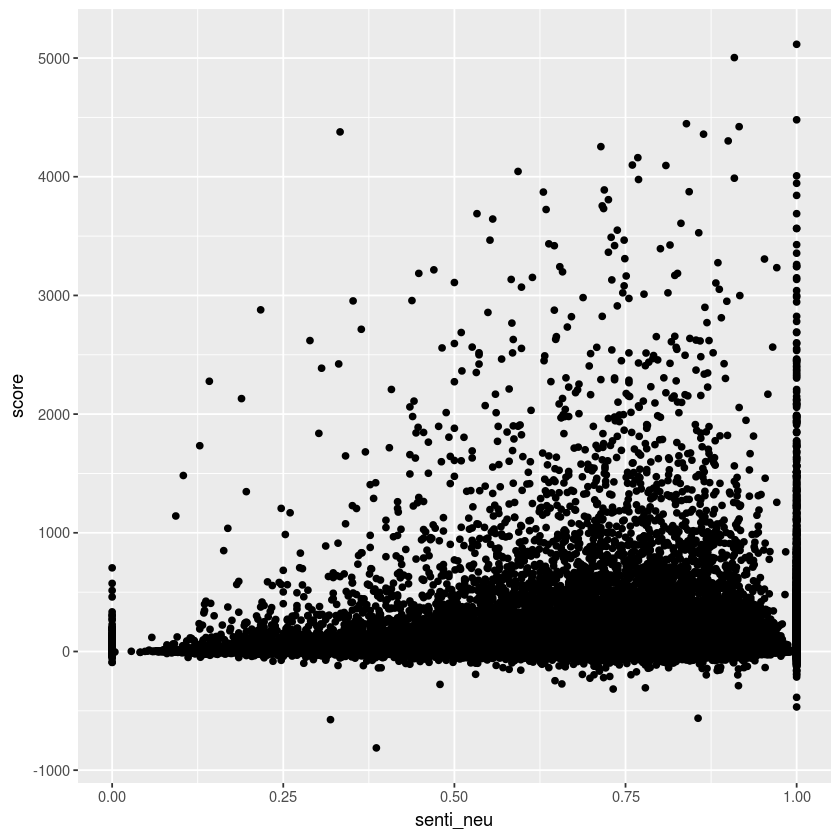

In [32]:
ggplot(data = tbplot, mapping = aes(x = senti_neu, y = score)) +
geom_point()

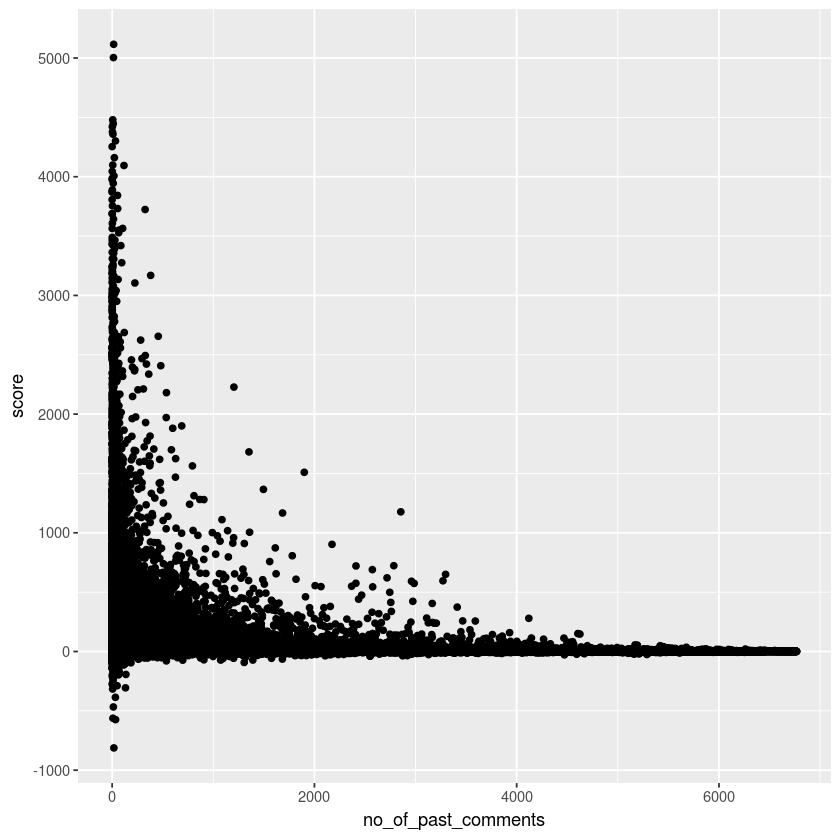

In [33]:
ggplot(data = tbplot, mapping = aes(x = no_of_past_comments, y = score)) +
geom_point()

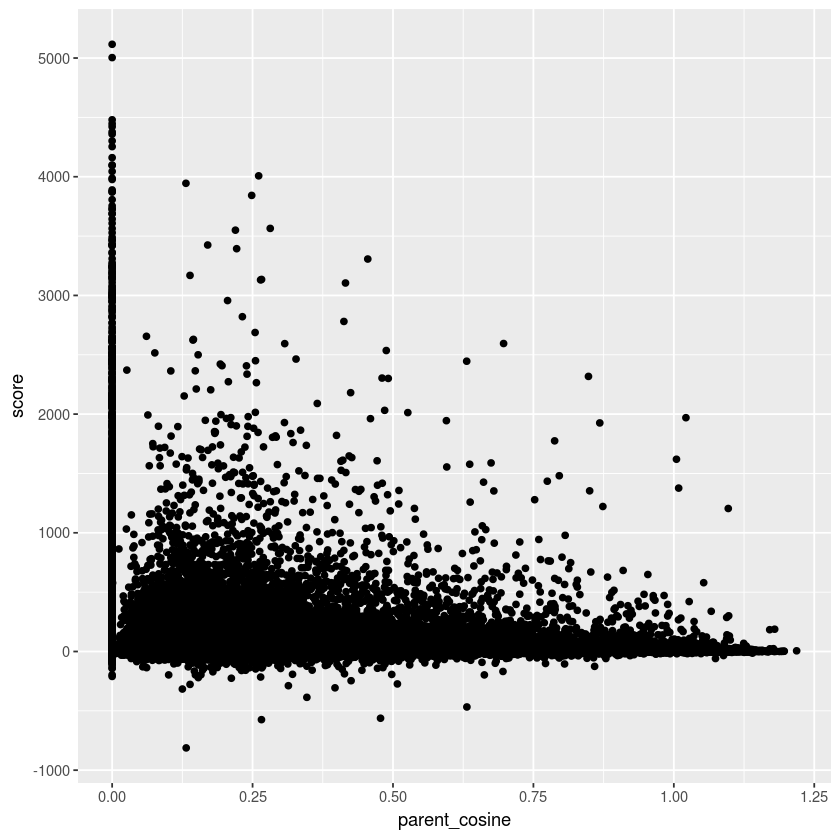

In [34]:
ggplot(data = tbplot, mapping = aes(x = parent_cosine, y = score)) +
geom_point()

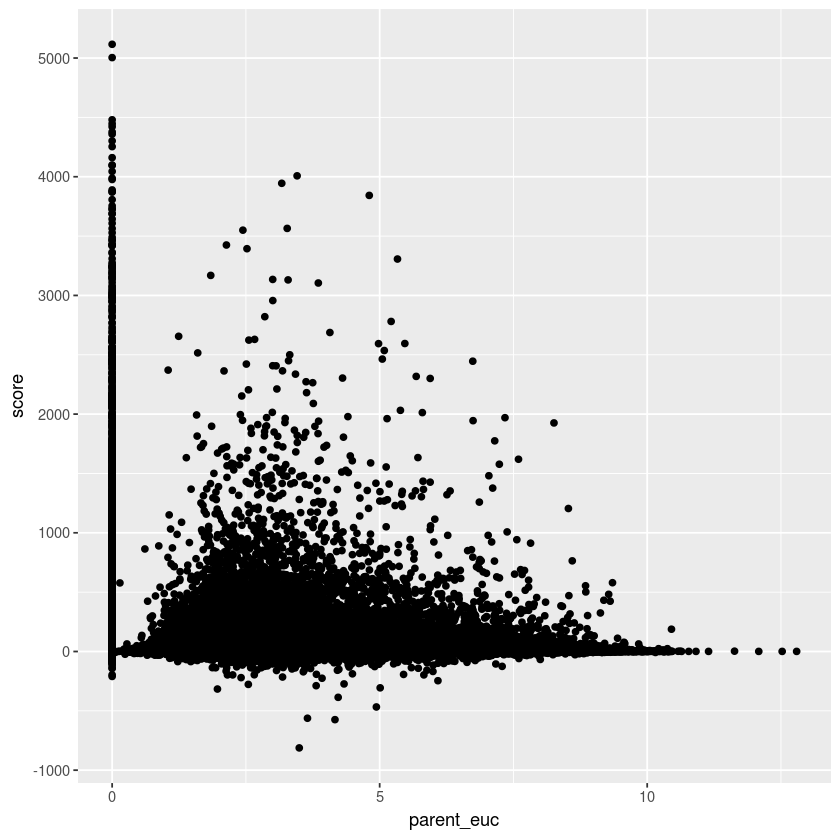

In [35]:
ggplot(data = tbplot, mapping = aes(x = parent_euc, y = score)) +
geom_point()

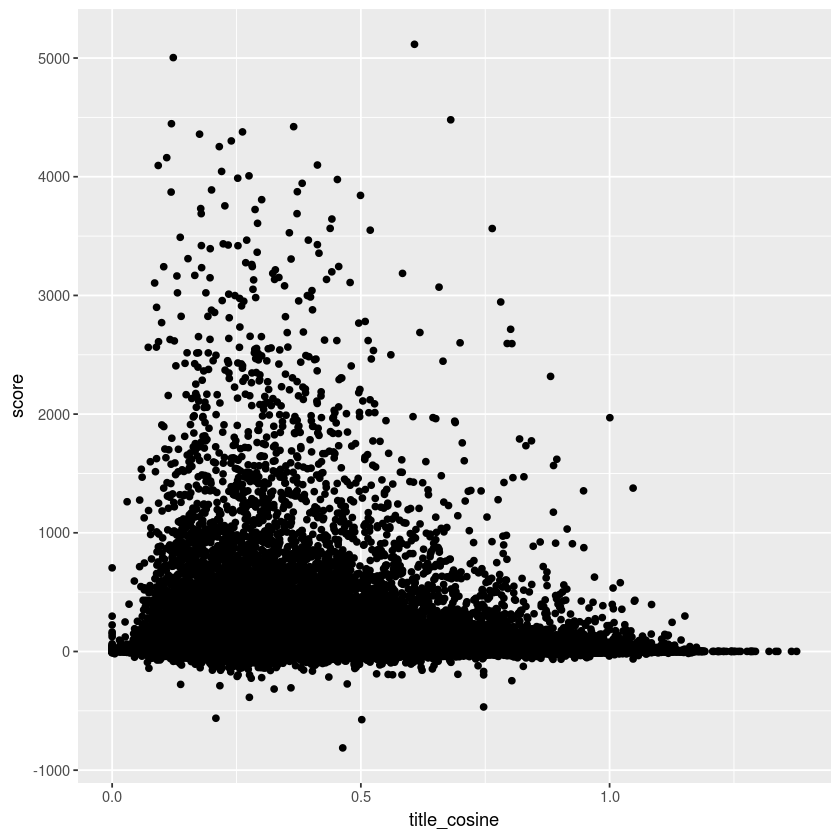

In [36]:
ggplot(data = tbplot, mapping = aes(x = title_cosine, y = score)) +
geom_point()

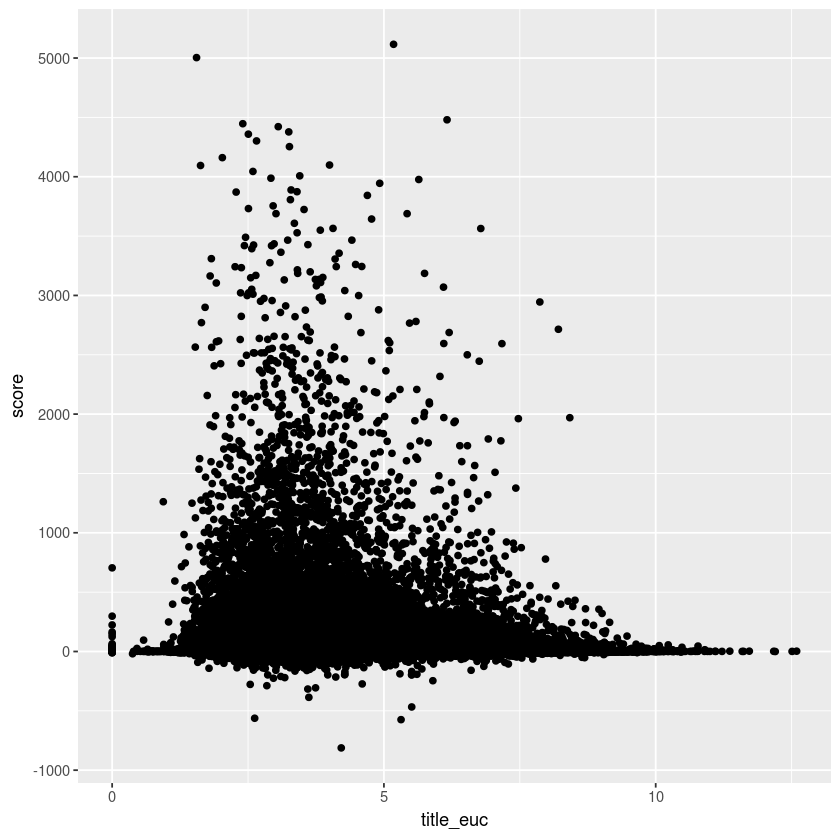

In [37]:
ggplot(data = tbplot, mapping = aes(x = title_euc, y = score)) +
geom_point()

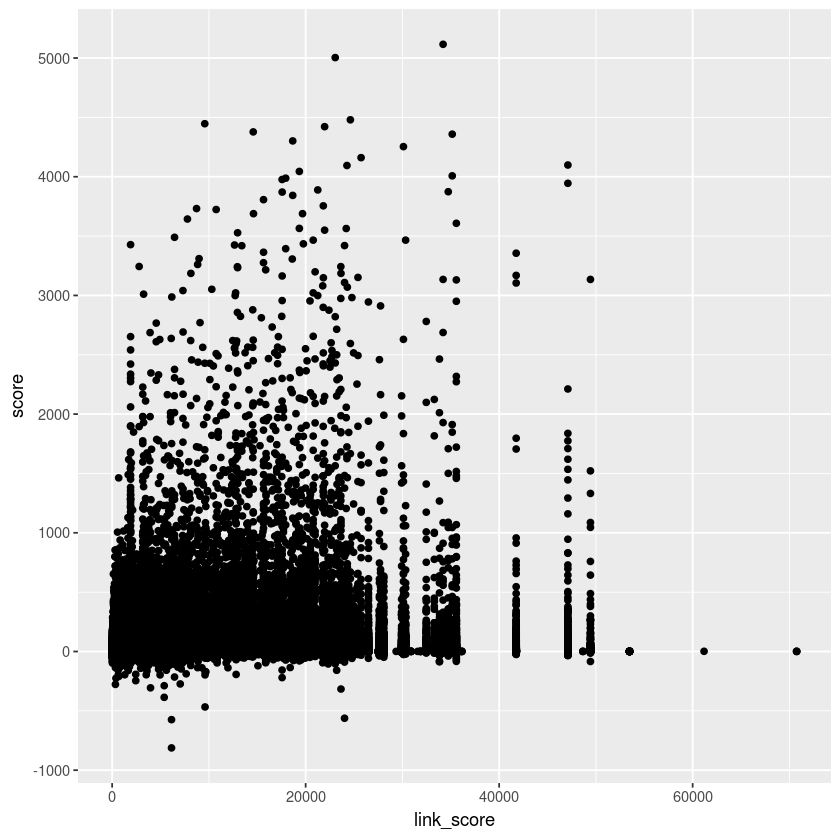

In [38]:
ggplot(data = tbplot, mapping = aes(x = link_score, y = score)) +
geom_point()

In [39]:
target <- 'score'

In [40]:
x <- dummy_df
y <- df[, target]

In [41]:
head(x)

over_18,is_edited,is_quoted,is_selftext,subredditfood,subredditgaming,subredditmovies,subredditscience,subredditworldnews,distinguishedadmin,⋯,senti_comp,no_quoted,time_since_parent,word_counts,no_of_past_comments,parent_cosine,parent_euc,title_cosine,title_euc,link_score
0,0,0,0,1,0,0,0,0,0,⋯,0.5423,0,0,31,0,0,0,0.2430492,3.188900,131
0,0,0,0,1,0,0,0,0,0,⋯,-0.5719,0,0,35,0,0,0,0.5145645,4.038003,3816
0,0,0,0,1,0,0,0,0,0,⋯,0.0000,0,0,9,1,0,0,0.6836220,4.657358,3816
0,0,0,0,1,0,0,0,0,0,⋯,0.0000,0,0,25,0,0,0,0.1300216,2.445490,12
0,0,0,0,1,0,0,0,0,0,⋯,-0.2732,0,0,10,0,0,0,0.6757869,5.911767,98
0,0,0,0,1,0,0,0,0,0,⋯,0.6696,0,0,8,0,0,0,0.5561019,5.644259,719


In [42]:
train_len <- floor(0.75 * nrow(x))
set.seed(0)
train_index <- sample(seq_len(nrow(x)), size=train_len)

In [43]:
train_x <- x[train_index, ]
test_x <- x[-train_index, ]
train_y <- y[train_index]
test_y <- y[-train_index]

In [44]:
head(train_x)

,over_18,is_edited,is_quoted,is_selftext,subredditfood,subredditgaming,subredditmovies,subredditscience,subredditworldnews,distinguishedadmin,⋯,senti_comp,no_quoted,time_since_parent,word_counts,no_of_past_comments,parent_cosine,parent_euc,title_cosine,title_euc,link_score
897738,0,0,0,0,0,0,0,0,1,0,⋯,0.0000,0,65034,16,500,0.2053211,2.745083,0.2956232,3.346080,7824
269776,0,0,0,0,0,1,0,0,0,0,⋯,0.0000,0,0,7,287,0.0000000,0.000000,0.5620310,5.567607,18402
377574,0,0,0,1,0,1,0,0,0,0,⋯,0.4404,0,3125,7,6,0.2107857,3.015407,0.2780098,3.671084,2
576898,0,0,0,1,0,0,1,0,0,0,⋯,-0.3595,0,0,25,25,0.0000000,0.000000,0.1142205,2.468535,3
909126,0,0,0,0,0,0,0,0,1,0,⋯,-0.2411,0,1995,19,79,0.2058893,2.762650,0.3000864,3.368667,4010
204441,0,0,0,1,0,1,0,0,0,0,⋯,0.0000,0,0,2,990,0.0000000,0.000000,0.6326558,6.773103,15700


In [45]:
linearMod <- lm(train_y ~ .,train_x)

In [46]:
summary(linearMod)


Call:
lm(formula = train_y ~ ., data = train_x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2107.6   -10.0    -4.9     0.4  5087.6 

Coefficients: (4 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.667e+02  2.740e+02   1.338 0.180840    
over_18                       5.646e+00  6.607e-01   8.546  < 2e-16 ***
is_edited                     9.524e+00  4.853e-01  19.624  < 2e-16 ***
is_quoted                     2.149e+00  4.756e-01   4.519 6.22e-06 ***
is_selftext                   4.158e-01  2.112e-01   1.969 0.048987 *  
subredditfood                -4.816e+00  4.099e-01 -11.750  < 2e-16 ***
subredditgaming              -1.309e+00  2.560e-01  -5.113 3.16e-07 ***
subredditmovies               2.449e+00  2.455e-01   9.973  < 2e-16 ***
subredditscience             -3.634e+00  3.987e-01  -9.116  < 2e-16 ***
subredditworldnews                   NA         NA      NA       NA    
distingui

In [53]:
newLinearMod <- lm( train_y ~ over_18 + is_edited + is_quoted + subredditfood + subredditgaming + subredditmovies + subredditscience + distinguishedmoderator + hour_of_comment5 + hour_of_comment6 + hour_of_comment12 + hour_of_comment13 + hour_of_comment14 + hour_of_comment15 + weekday2 + gilded + controversiality + upvote_ratio + time_since_link + depth + no_of_linked_sr + no_of_linked_urls + parent_score + comment_tree_root_score + time_since_comment_tree_root  + subjectivity + time_since_parent + word_counts + no_of_past_comments + parent_cosine + parent_euc + title_euc +link_score, train_x)

In [54]:
summary(newLinearMod)


Call:
lm(formula = train_y ~ over_18 + is_edited + is_quoted + subredditfood + 
    subredditgaming + subredditmovies + subredditscience + distinguishedmoderator + 
    hour_of_comment5 + hour_of_comment6 + hour_of_comment12 + 
    hour_of_comment13 + hour_of_comment14 + hour_of_comment15 + 
    weekday2 + gilded + controversiality + upvote_ratio + time_since_link + 
    depth + no_of_linked_sr + no_of_linked_urls + parent_score + 
    comment_tree_root_score + time_since_comment_tree_root + 
    subjectivity + time_since_parent + word_counts + no_of_past_comments + 
    parent_cosine + parent_euc + title_euc + link_score, data = train_x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2107.9    -9.9    -5.0     0.3  5088.6 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -4.147e+00  6.369e-01  -6.511 7.46e-11 ***
over_18                       5.641e+00  6.576e-01   8.578  < 2e-16 ***
is_edited                  